# NURBS object creation

Content:
* [Curve in 3D](#curve)
* [Surface in 3D](#surface)
* [Plot with pyvista](#pyvista)

To create any NURBS object we just need a set of control points and knot vectors.

In [19]:
import numpy as np
import matplotlib
#matplotlib.use("Qt5Agg") # Iteractive backend
# Inline plotting
%matplotlib inline 

<a id='curve'></a>
## 1) Curve

In [20]:
cp = np.array([[30,0,15],
               [30,5,25],
               [30,10,5],
               [25,10,15],
               [25,5,0],
               [25,0,-5]])

knot=np.array([0,0,0,0.3,0.5,0.7,1,1,1])

weight=np.array([[[1],[1],[1],[1],[1],[1]]])



In [21]:
from pygeoiga.nurb import NURB

In [22]:
nrb = NURB(cp, [knot], weight)

In [23]:
print("degree of curve:", nrb.degree)
print("dimension of curve:", nrb.dim)

degree of curve: [2]
dimension of curve: 3


In [24]:
# B matrix stores the control points and weights
nrb.B

array([[30.,  0., 15.,  1.],
       [30.,  5., 25.,  1.],
       [30., 10.,  5.,  1.],
       [25., 10., 15.,  1.],
       [25.,  5.,  0.,  1.],
       [25.,  0., -5.,  1.]])

In [25]:
# plotting 
from pygeoiga.plot.nrbplotting_mpl import p_cpoints, p_knots, p_curve, create_figure

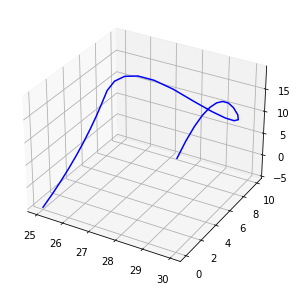

In [26]:
# for plotting, is just needed always the control points and knot vectors
fig, ax = create_figure("3d")
ax = p_curve(nrb.knots, nrb.cpoints, weight=nrb.weight, ax=ax, dim=3)

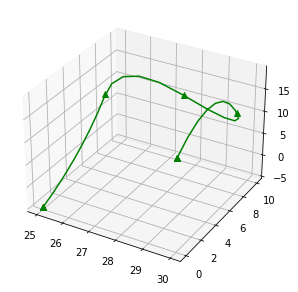

In [27]:
fig, ax = create_figure("3d")
ax = p_knots(nrb.knots, nrb.cpoints, weight=nrb.weight, ax=ax, dim=3)

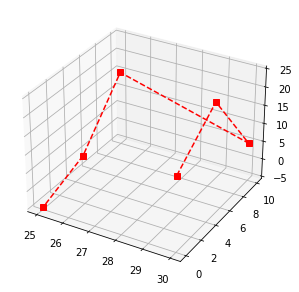

In [28]:
fig, ax = create_figure("3d")
ax = p_cpoints(nrb.cpoints, ax=ax, dim=1)

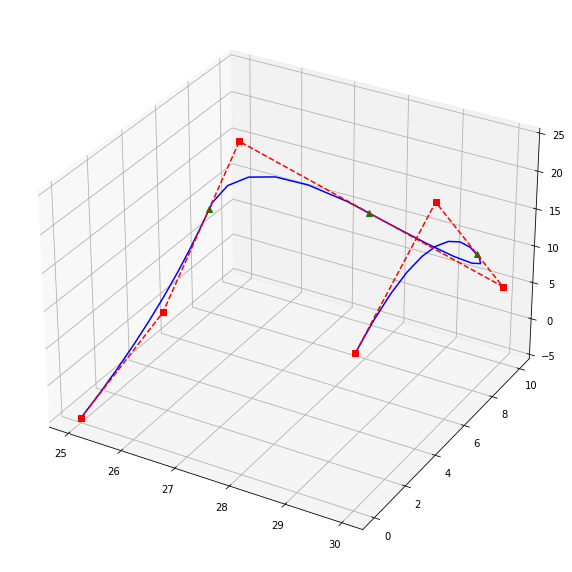

In [29]:
# all together
fig, ax = create_figure("3d", figsize=(10,20))
ax = p_curve(nrb.knots, nrb.cpoints, weight=nrb.weight, ax=ax, dim=3)
ax = p_knots(nrb.knots, nrb.cpoints, weight=nrb.weight, ax=ax, dim=3, line = False, point=True)
ax = p_cpoints(nrb.cpoints, ax=ax, dim=1)

<a id='surface'></a>
# 2) Surface

In [30]:
C = np.zeros((3, 5, 5))
C[:, :, 0] = [[0.0, 3.0, 5.0, 8.0, 10.0],
              [0.0, 0.0, 0.0, 0.0, 0.0],
              [2.0, 2.0, 7.0, 7.0, 8.0], ]
C[:, :, 1] = [[0.0, 3.0, 5.0, 8.0, 10.0],
              [3.0, 3.0, 3.0, 3.0, 3.0],
              [0.0, 0.0, 5.0, 5.0, 7.0], ]
C[:, :, 2] = [[0.0, 3.0, 5.0, 8.0, 10.0],
              [5.0, 5.0, 5.0, 5.0, 5.0],
              [0.0, 0.0, 5.0, 5.0, 7.0], ]
C[:, :, 3] = [[0.0, 3.0, 5.0, 8.0, 10.0],
              [8.0, 8.0, 8.0, 8.0, 8.0],
              [5.0, 5.0, 8.0, 8.0, 10.0], ]
C[:, :, 4] = [[0.0, 3.0, 5.0, 8.0, 10.0],
              [10.0, 10.0, 10.0, 10.0, 10.0],
              [5.0, 5.0, 8.0, 8.0, 10.0], ]
C = C.transpose()
U = [0, 0, 0, 1 / 3., 2 / 3., 1, 1, 1]
V = [0, 0, 0, 1 / 3., 2 / 3., 1, 1, 1]

In [31]:
nrb2 = NURB(C, [U, V])
nrb2.B

array([[[ 0.,  0.,  2.,  1.],
        [ 3.,  0.,  2.,  1.],
        [ 5.,  0.,  7.,  1.],
        [ 8.,  0.,  7.,  1.],
        [10.,  0.,  8.,  1.]],

       [[ 0.,  3.,  0.,  1.],
        [ 3.,  3.,  0.,  1.],
        [ 5.,  3.,  5.,  1.],
        [ 8.,  3.,  5.,  1.],
        [10.,  3.,  7.,  1.]],

       [[ 0.,  5.,  0.,  1.],
        [ 3.,  5.,  0.,  1.],
        [ 5.,  5.,  5.,  1.],
        [ 8.,  5.,  5.,  1.],
        [10.,  5.,  7.,  1.]],

       [[ 0.,  8.,  5.,  1.],
        [ 3.,  8.,  5.,  1.],
        [ 5.,  8.,  8.,  1.],
        [ 8.,  8.,  8.,  1.],
        [10.,  8., 10.,  1.]],

       [[ 0., 10.,  5.,  1.],
        [ 3., 10.,  5.,  1.],
        [ 5., 10.,  8.,  1.],
        [ 8., 10.,  8.,  1.],
        [10., 10., 10.,  1.]]])

In [32]:
print("degree of surface:", nrb2.degree)
print("dimension of surface:", nrb2.dim)

degree of surface: [2 2]
dimension of surface: 3


In [33]:
from pygeoiga.plot.nrbplotting_mpl import p_surface

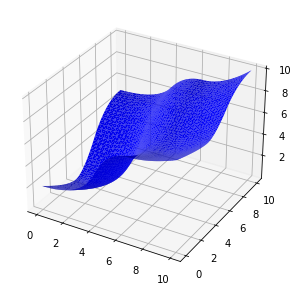

In [34]:
# for plotting, is just needed always the control points and knot vectors
fig, ax = create_figure("3d")
ax = p_surface(nrb2.knots, nrb2.cpoints, weight=nrb2.weight, ax=ax, dim=3)

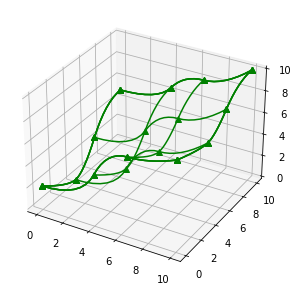

In [37]:
fig, ax = create_figure("3d")
ax = p_knots(nrb2.knots, nrb2.cpoints, weight=nrb2.weight, ax=ax, dim=3)

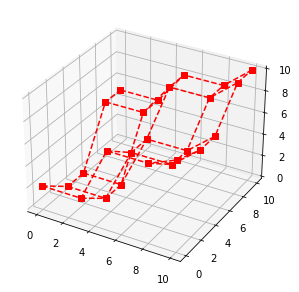

In [40]:
fig, ax = create_figure("3d")
ax = p_cpoints(nrb2.cpoints, ax=ax, dim=3)

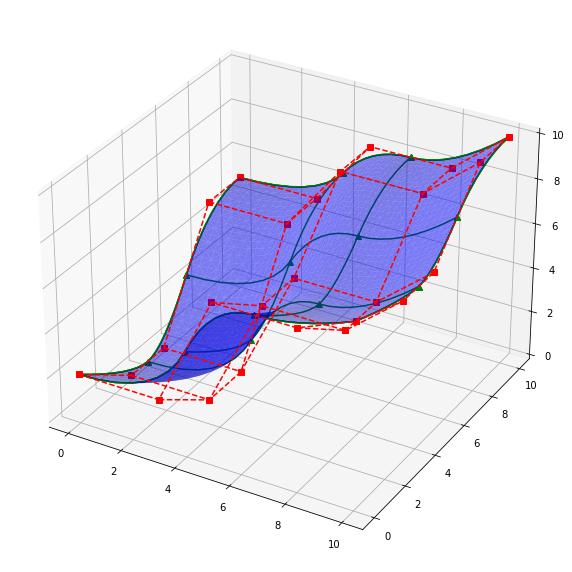

In [45]:
# all together
fig, ax = create_figure("3d", figsize=(10,20))
ax = p_surface(nrb2.knots, nrb2.cpoints, weight=nrb2.weight, ax=ax, dim=3, alpha=0.5)
ax = p_knots(nrb2.knots, nrb2.cpoints, weight=nrb2.weight, ax=ax, dim=3,)
ax = p_cpoints(nrb2.cpoints, ax=ax, dim=3)

<a id='pyvista'></a>
## 4) Plotting with pyvista

In [46]:
from pygeoiga.plot.nrbplotting_vtk import create_figure, p_show, p_cpoints, p_surface, p_knots, p_show

In [59]:
p = create_figure(notebook=False)
p_surface(nrb2.knots, nrb2.cpoints, weight=nrb2.weight, p=p, interactive=True, radius=0.5)
p_show(p)

In [61]:
p = create_figure(notebook=False)
p_cpoints(nrb2.cpoints, p=p)
p_knots(nrb2.knots, nrb2.cpoints, p=p)
p_show(p)